<h1><center>
Code
    </center></h1>


In [1]:
import praw
import pandas as pd
import pprint

import re

from nltk.sentiment import SentimentIntensityAnalyzer

import seaborn as sns
from scipy.stats import mannwhitneyu


import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


import networkx.algorithms.community as nx_com 


In [2]:
reddit_acct = "Continuous_Questions"


reddit = praw.Reddit(
    client_id= "UzBH-QWZMRkNzaYgHFK1aw",
    client_secret= "ODSzwgsmduXWDLmR_7nuTZBWndPgcQ" ,
    user_agent=f"Comment Extraction (by u/{reddit_acct})",
)


Version 7.7.1 of praw is outdated. Version 7.8.1 was released Friday October 25, 2024.


## Time Series

In [3]:
## Collecting the comments and children from post race discussion forums 

URLs_list = ["https://www.reddit.com/r/formula1/comments/mf4f1j/2021_bahrain_grand_prix_post_race_discussion/",
            "https://www.reddit.com/r/formula1/comments/mtej2n/2021_emilia_romagna_grand_prix_post_race/",
            "https://www.reddit.com/r/formula1/comments/n38wy3/2021_portuguese_grand_prix_post_race_discussion/",
             "https://www.reddit.com/r/formula1/comments/n8fh0h/2021_spanish_grand_prix_post_race_discussion/", 
             "https://www.reddit.com/r/formula1/comments/nj941m/2021_monaco_grand_prix_post_race_discussion/",
             "https://www.reddit.com/r/formula1/comments/ntmqxp/2021_azerbaijan_grand_prix_post_race_discussion/",
             "https://www.reddit.com/r/formula1/comments/o46yje/2021_french_grand_prix_post_race_discussion/", 
             "https://www.reddit.com/r/formula1/comments/o8y2mf/2021_styrian_grand_prix_post_race_discussion/", 
             "https://www.reddit.com/r/formula1/comments/odli6s/2021_austrian_grand_prix_post_race_discussion/", 
             "https://www.reddit.com/r/formula1/comments/omtjjt/2021_british_grand_prix_postrace_discussion/", 
             "https://www.reddit.com/r/formula1/comments/ovtse3/2021_hungarian_grand_prix_post_race_discussion/", 
             "https://www.reddit.com/r/formula1/comments/pdyvog/2021_belgian_grand_prix_post_race_discussion/",
             "https://www.reddit.com/r/formula1/comments/pie5jd/2021_dutch_grand_prix_post_race_discussion/",
             "https://www.reddit.com/r/formula1/comments/pmtm7l/2021_italian_grand_prix_post_race_discussion/", 
             "https://www.reddit.com/r/formula1/comments/pvtxwa/2021_russian_grand_prix_post_race_discussion/", 
             "https://www.reddit.com/r/formula1/comments/q58543/2021_turkish_grand_prix_post_race_discussion/",
             "https://www.reddit.com/r/formula1/comments/qf0nsb/2021_united_states_grand_prix_post_race_discussion/",
             "https://www.reddit.com/r/formula1/comments/qoxc75/2021_mexico_city_grand_prix_post_race_discussion/", 
             "https://www.reddit.com/r/formula1/comments/qtw6a9/2021_s%C3%A3o_paulo_grand_prix_post_race_discussion/", 
             "https://www.reddit.com/r/formula1/comments/qyx9fs/2021_qatar_grand_prix_post_race_discussion/",
             "https://www.reddit.com/r/formula1/comments/r9nikh/2021_saudi_arabian_grand_prix_post_race_discussion/",
             "https://www.reddit.com/r/formula1/comments/reqi8i/2021_abu_dhabi_grand_prix_post_race_discussion/",
              
                  "https://www.reddit.com/r/formula1/comments/tip2w4/2022_bahrain_grand_prix_post_race_discussion/",
    "https://www.reddit.com/r/formula1/comments/tppwp7/2022_saudi_arabian_grand_prix_post_race_discussion/",
    "https://www.reddit.com/r/formula1/comments/u0btu1/2022_australian_grand_prix_post_race_discussion/",
    "https://www.reddit.com/r/formula1/comments/uaw33k/2022_emilia_romagna_grand_prix_post_race/", 
    "https://www.reddit.com/r/formula1/comments/ulb8wb/2022_miami_grand_prix_post_race_discussion/", 
    "https://www.reddit.com/r/formula1/comments/uvcbkb/2022_spanish_grand_prix_post_race_discussion/", 
    "https://www.reddit.com/r/formula1/comments/v0e8g0/2022_monaco_grand_prix_post_race_discussion/", 
    "https://www.reddit.com/r/formula1/comments/val3p8/2022_azerbaijan_grand_prix_post_race_discussion/", 
    "https://www.reddit.com/r/formula1/comments/vg2umq/2022_canadian_grand_prix_post_race_discussion/", 
    "https://www.reddit.com/r/formula1/comments/vql5wh/2022_british_grand_prix_post_race_discussion/",
    "https://www.reddit.com/r/formula1/comments/vvsmxf/2022_austrian_grand_prix_post_race_discussion/",
    "https://www.reddit.com/r/formula1/comments/w6x039/2022_french_grand_prix_post_race_discussion/",
    "https://www.reddit.com/r/formula1/comments/wcqc48/2022_hungarian_grand_prix_post_race_discussion/", 
    "https://www.reddit.com/r/formula1/comments/wzwum5/2022_belgian_grand_prix_post_race_discussion/", 
    "https://www.reddit.com/r/formula1/comments/x5okct/2022_dutch_grand_prix_post_race_discussion/",
    "https://www.reddit.com/r/formula1/comments/xbjvas/2022_italian_grand_prix_post_race_discussion/",
    "https://www.reddit.com/r/formula1/comments/xtr6g2/2022_singapore_grand_prix_post_race_discussion/",
    "https://www.reddit.com/r/formula1/comments/xzg131/2022_japanese_grand_prix_post_race_discussion/",
    "https://www.reddit.com/r/formula1/comments/ybshhu/2022_united_states_grand_prix_post_race_discussion/",
    "https://www.reddit.com/r/formula1/comments/yhqt7c/2022_mexico_city_grand_prix_post_race_discussion/",
    "https://www.reddit.com/r/formula1/comments/yubpsl/2022_s%C3%A3o_paulo_grand_prix_post_race_discussion/",
    "https://www.reddit.com/r/formula1/comments/z05j85/2022_abu_dhabi_grand_prix_post_race_discussion/"

            ]


counter_total = [0] * len(URLs_list)

names_total = ["Placeholder"] * len(URLs_list)

dic = {"Race": names_total,
      "Comments": counter_total}

comments_df = pd.DataFrame(dic)


#### 

for url in range(0, len(URLs_list)): 
        
    sf = URLs_list[url]
    submission = reddit.submission(url=sf)

    
    comments_df.loc[url, "Race"] = ' '.join(re.findall("(20.*)_grand", URLs_list[url]))
    
    
    counter = 0 

    for i in range(0, len(submission.comments)): 
        try: 
            submission.comments[i].children
        except: 
            counter = counter + 1 
        else:
            counter = counter + len(submission.comments[i].children)
    
    
    comments_df.loc[url, "Comments"] = counter


In [ ]:
## Creating a barplot with the comments 

fig = plt.figure(1,figsize=(16,7)) 

cols = ['gray' if (x < max(comments_df["Comments"])) else 'red' for x in comments_df["Comments"]]



ax = sns.barplot(data = comments_df, x = "Race", y = "Comments", palette = cols)
ax.tick_params(axis='x', rotation=90, labelsize=11)
ax.tick_params(axis='y', labelsize=12)


ax.set_ylabel("Number of Comments", fontsize = 14)
ax.set_xlabel("Race", fontsize = 14)
ax.set_title("Comments Over Time", fontsize = 16)


#plt.savefig('Image1.jpg', bbox_inches='tight')
#plt.show()
#plt.close(fig)

## Figure included in report

# Sentiment Analysis

In [5]:
## Importing the Subreddit

sf = "https://www.reddit.com/r/formula1/comments/reqi8i/2021_abu_dhabi_grand_prix_post_race_discussion/"
submission = reddit.submission(url=sf)


root = submission.id
submission.comments.replace_more(limit=150)
c_list = submission.comments.list()
post_users = {root: submission.author.name}


In [6]:
## Extracting the comments for sentiment analysis 

comments_list = []

for comment in c_list: 
        if comment.author:
            post_users[comment.id] = comment.author.name
            comments_list.append([comment.id, comment.author.name, comment.body])
            
comments_df = pd.DataFrame(comments_list, 
                          columns = ["CommentId", "AuthorName", "Comment"])

# comments_df.head(2)

In [7]:
## Putting comments into categories and performing sentiment analysis 

sia = SentimentIntensityAnalyzer()

def categories(comment):
    
    if ("Max" or "max" or "Verstappen" or "verstappen") in comment:
        return("Max")
    
    elif ("Lewis" or "Hamilton" or "lewis" or "hamilton") in comment:
        return("Lewis")
    
    else:
        return("None")
    
    

comments_df["Sentiment"] = comments_df["Comment"].map(lambda x: sia.polarity_scores(x))

comments_df["Neg_Sentiment"] = comments_df["Comment"].map(lambda x: sia.polarity_scores(x)["neg"])

comments_df["Pos_Sentiment"] = comments_df["Comment"].map(lambda x: sia.polarity_scores(x)["pos"])

comments_df["Category"] = comments_df["Comment"].map(lambda x: categories(x))

# comments_df["Category"].value_counts()
# comments_df.groupby("Category").agg("mean")

In [8]:
## Color coding the comments 

def color_code(comment):
    
    if ("Max") in comment:
        return("red")
    
    elif ("Lewis") in comment:
        return("black")
    
    else:
        return("None")
    
comments_df["Color_Code"] = comments_df["Category"].map(lambda x: color_code(x))

# comments_df["Color_Code"].value_counts()

In [9]:
## Filtering by only the comments that mentioned Max or Lewis 

category_df = comments_df[~(comments_df["Color_Code"] == "None")].reset_index(drop = True )

In [10]:
## Visualizing the difference in sentiment between the comments 


fig, axes = plt.subplots(1, 2, figsize=(16, 5))

ax0 = sns.boxplot(data = category_df, x = "Category", y = "Pos_Sentiment", palette = ["red", "gray"], 
                 ax = axes[0])
ax0.set_ylabel("Pos_Sentiment", fontsize = 13)
ax0.set_xlabel("Category", fontsize = 13)
ax0.tick_params(axis='both', labelsize=13)
axes[0].set_title("Positive Sentiment", fontsize = 16)




ax1 = sns.boxplot(data = category_df, x = "Category", y = "Neg_Sentiment", palette = ["red", "gray"], 
                 ax = axes[1])
ax1.set_ylabel("Neg_Sentiment", fontsize = 13)
ax1.set_xlabel("Category", fontsize = 13)
ax1.tick_params(axis='both', labelsize=13)
axes[1].set_title("Negative Sentiment", fontsize = 16)


# fig.savefig('Image2.jpg', bbox_inches='tight')
# fig.show()
plt.close(fig)

C:\Users\schoo\AppData\Local\Temp\ipykernel_10308\433286162.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax0 = sns.boxplot(data = category_df, x = "Category", y = "Pos_Sentiment", palette = ["red", "gray"],
C:\Users\schoo\AppData\Local\Temp\ipykernel_10308\433286162.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.boxplot(data = category_df, x = "Category", y = "Neg_Sentiment", palette = ["red", "gray"],


In [11]:
## Statistical test on positive sentiment 

max_positive = category_df[category_df["Category"] == "Max"]["Pos_Sentiment"]
lewis_positive = category_df[category_df["Category"] == "Lewis"]["Pos_Sentiment"]

mannwhitneyu(max_positive, lewis_positive, alternative = "greater")

MannwhitneyuResult(statistic=708066.5, pvalue=0.002357609312632339)

In [12]:
## Statistical test on negative sentiment 

max_negative = category_df[category_df["Category"] == "Max"]["Neg_Sentiment"]
lewis_negative = category_df[category_df["Category"] == "Lewis"]["Neg_Sentiment"]

mannwhitneyu(max_negative, lewis_negative, alternative = "less")

MannwhitneyuResult(statistic=624316.5, pvalue=0.015348079897270871)

## Networks 

In [13]:
## Creating a dictionary using the comments 

few_comments_list = list(category_df["CommentId"])

full_list = []
for i in range (0, len(c_list)): 
    if (c_list[i] in few_comments_list):
        full_list.append(c_list[i])
        
comment_dictionary = pd.Series(category_df["Color_Code"].values, index = category_df["CommentId"]).to_dict()

edge_colors = {"red":"red",
              "black":"black",
              "yellow": "yellow"}

def get_comments_as_edges(submission, full_list):
    
        
    post_users = {root: submission.author.name}
    
    c_list = full_list
    
    counter = 0 

    for c in c_list: 
        if c.author:
            post_users[c.id] = c.author.name
        
    edges = {}
    colors_edges = {}
    
    for c in c_list:
        parent = c.parent_id[3:]
        if parent == root:
            continue
        
        
                    
        if c.author and parent in post_users.keys():
            if (c.author.name, post_users[parent]) in edges:
                edges[(c.author.name, post_users[parent])] += (1)
                colors_edges[(c.author.name, post_users[parent])] = comment_dictionary[c.id]
            else:
                edges[(c.author.name, post_users[parent])] = (1)
                colors_edges[(c.author.name, post_users[parent])] = comment_dictionary[c.id]

    return edges, colors_edges


total_edges = {}

edge_list, colors_edges = get_comments_as_edges(submission, full_list)


total_edges = {}

if edge_list:
    for edge in edge_list:
        if edge in total_edges.keys():
            total_edges[edge] = total_edges[edge] + edge_list[edge]
        else:
            total_edges[edge] = edge_list[edge]

In [14]:
## Creating and drawing the full network 

G = nx.DiGraph(total_edges.keys())

color_list = []
for edges in G.edges:
    color_list.append(colors_edges[edges])
    
    

fig = plt.figure(1,figsize=(15,15)) 


nx.draw_networkx(G,edge_color = color_list, 
                 node_color = "blue",
                 node_size = 15,
                 arrowsize = 15,
                 with_labels = False)

plt.close(fig)

In [15]:
## Creating and drawing the weakly connected component 

largest_comp_nodes = max(sorted(nx.weakly_connected_components(G), key=len, reverse=True)) 

G_largest = G.subgraph(largest_comp_nodes)

color_list_2 = []
for edges in G_largest.edges:
    color_list_2.append(colors_edges[edges])
    

fig = plt.figure(1,figsize=(15,15)) 

nx.draw_networkx(G_largest,edge_color = color_list_2, 
                 node_color = "blue",
                 node_size = 15,
                 arrowsize = 15,
                 with_labels = False)

plt.close(fig)

In [16]:
## Creating seperate networks for Max and Lewis 

max_comments = [k for k,v in colors_edges.items() if v == "red"]

MAX = nx.DiGraph()

for edges in max_comments:
    
    try: 
        G_largest.edges(edges[0], edges[1])
        
        if(G_largest.edges(edges[0], edges[1])):
            MAX.add_edge(edges[0], edges[1])
    except: 
        continue 


lewis_comments = [k for k,v in colors_edges.items() if v == "black"]

LEWIS = nx.DiGraph()

for edges in lewis_comments:
    
    try: 
        G_largest.edges(edges[0], edges[1])
        
        if(G_largest.edges(edges[0], edges[1])):
            LEWIS.add_edge(edges[0], edges[1])
    except: 
        continue 

In [17]:
## Finding the communities for the MAX and LEWIS networks  

MAX_greedy = nx_com.greedy_modularity_communities(MAX)

max_community = []

for c,i in enumerate(MAX_greedy): 
    max_community.append(len(i))
    

LEWIS_greedy = nx_com.greedy_modularity_communities(MAX)

lewis_community = []

for c,i in enumerate(LEWIS_greedy): 
    lewis_community.append(len(i))

    
max_lewis_df = pd.DataFrame({"Max": max_community,
                            "Lewis": lewis_community})

df_melted = pd.melt(max_lewis_df)


In [29]:
## Drawing boxplots for the MAX and LEWIS communities 
## Drawing the network for the weakly connected component 

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

ax0 = nx.draw_networkx(G_largest,edge_color = color_list_2, 
                 node_color = "blue",
                 node_size = 20,
                 arrowsize = 15,
                 with_labels = False, 
                      ax = axes[0])

axes[0].set_title("Weakly Connected Component of Comments", fontsize = 16)
max_patch = mpatches.Patch(color = 'red', label = 'Max')
lewis_patch = mpatches.Patch(color ='black', label = 'Lewis')

axes[0].legend(handles = [max_patch, lewis_patch], fontsize = 13)





ax1 = sns.boxplot(data = df_melted, x = "variable", y = "value", palette = ["red", "gray"], ax = axes[1])
ax1.set_ylabel("Community Sizes", fontsize = 13)
ax1.set_xlabel("Category", fontsize = 13)
ax1.tick_params(axis='both', labelsize=13)
axes[1].set_title("Community Sizes", fontsize = 16, loc = "center")


#fig.savefig('Image3.jpg', bbox_inches='tight')
#fig.show()
plt.close(fig)

C:\Users\schoo\AppData\Local\Temp\ipykernel_10308\3481002763.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.boxplot(data = df_melted, x = "variable", y = "value", palette = ["red", "gray"], ax = axes[1])


In [22]:
## Performing statistical test on MAX and LEWIS community sizes 

mannwhitneyu(max_community, lewis_community, alternative = "two-sided")

MannwhitneyuResult(statistic=50.0, pvalue=1.0)

In [23]:
## Verifying that the communities are the same for both groups

lewis_community == max_community

True

<h1><center>
Analyzing Formula 1 fan reactions to winning and losing using NLP and network techniques
</center></h1>



### Introduction 

The 2021 Formula 1 season was one of the tightest battles in recent history with defending champion Lewis Hamilton competing with Max Verstappen for the championship. When a controversial call led to Max winning the title during the Abu Dhabi Grand Prix, discussion continued into the night as the win was disputed. While waiting for the results, Formula 1 fans rushed to the internet to debate the outcome. 

One such forum was the discussion forum on the _formula1_ subreddit. The subreddit hosts post race discussions after every race, attracting fans from all over the paddock. 

My research questions are as follows: On the 2021 Abu Dhabi Grand Prix post race discussion forum, is there a difference in sentiment between comments that mention Max and Lewis, and are these comments clustered together in a community? 


### Research motivation

Even though sports can act to bring people together, sports-based antagonism is an unfortunate repercussion of high stakes games. Additionally, sports-based antagonism that turns to violence puts a strain on local emergency forces. For example, a paper from 2005 [4] examining rugby and football matches reports that emergency treatment for assault related injuries in Wales were higher when the national team lost. 

The exact dynamics of the antagonism still need to be understood. For example, will fans of the winning team be content to celebrate together or will they deliberately go and antagonize opposing fans? While it is beyond the scope of this paper to look into physical interactions, looking at interactions online might be the first step in understanding this dynamic. 


### Methodology 

In order to see if there was a difference in sentiment between comments mentioning Max and Lewis, I collected comments with variations of their first and last names. I then used _SentimentIntensityAnalyzer()_ from the Natural Language Toolkit to give each comment a positive and a negative score. The means of the scores were compared using the Mann-Whitney U Test. 

In order to compare the network of Hamilton and Verstappen comments, I created a directed network with edges directed towards the parent comment. I then filtered down to the weakly connected component to remove comments that only had one reply. 

After that, I split the network into two– one containing all comments mentioning Max and one containing all comments mentioning Lewis. I used _greedy_modularity_communities()_ to see how many communities there were in each network, and how big those communities were. The means of these communities’ sizes were then compared using the Mann-Whitney U Test.

I used the Mann-Whitney U Test in both cases given that the sample sizes were unequal and, in the case of the community comparison, quite small. 


### Descriptive results 

Previous research [1] showed that the number of interactions on sports forum increase with high-stakes games. I verified this on the _formula1_ subreddit by adding together the number of children comments for the 2021 and 2022 post race discussions. As can be seen below, the Abu Dhabi 2021 discussion has the most comments of the two years, signaling the high stakes of the race.  



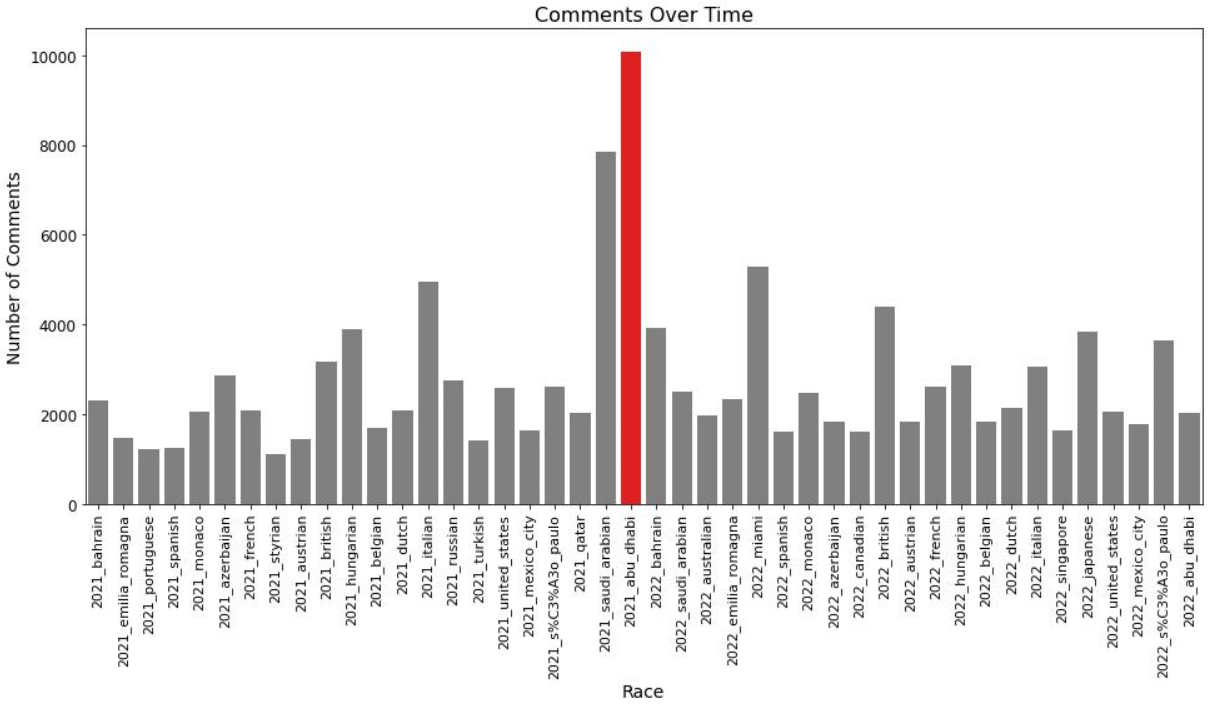



In terms of sentiment analysis, it does appear on the box plots below that comments mentioning Max have a higher positive sentiment than comments mentioning Lewis. The reverse is true for the negative sentiment. 


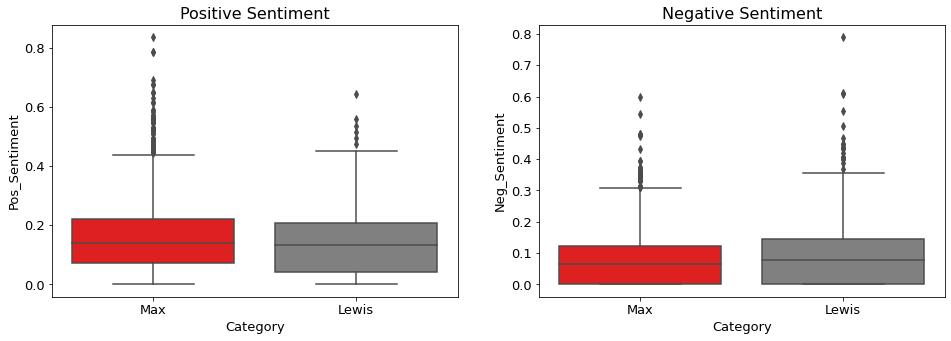


Looking at the box plot comparing the sizes of the communities, there does not appear to be any difference between communities mentioning Max or Lewis. This can also be seen on the network diagram where comments mentioning Max or Lewis don’t cluster around one parent comment. 

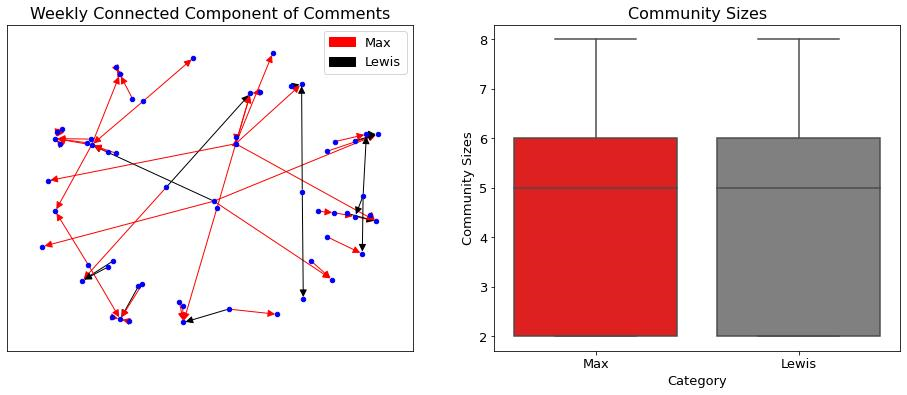


### Analysis 
Performing the Mann-Whitney U Test on the comment sentiments and the community sizes resulted in the following table. 


| Test | Alternative Hypothesis | p-value |
| :-: | :-: | :-: |
| Postive Sentiment | Max > Lewis | 0.0024 |
| Negative Sentiment | Max < Lewis | 0.0153 |
| Community | Two-Sided | 1.0 |

Using a significance value of 0.05, it does appear that comments mentioning Max have a significantly higher positive sentiment than comments mentioning Lewis. This is not the case for negative sentiment. The p-value for comparing the community size between the two users is 1.0. This is due to the fact that the number of communities between the two groups and their sizes are exactly the same. 


### Limitations

My first limitation is in terms of the text analysis. I did not pre-process the comments and only looked for the drivers’ first names and last names. I purposely did not look for any derogatory nicknames as those would likely have been removed by the moderators. The lack of removing any stop words might also have affected _SentimentIntensityAnalyzer()_ from accurately classifying sentiment. 

Another limitation in terms of text analysis was assuming that Max fans wouldn’t mention Lewis and vice-versa. Additionally, some of the longer responses mention both Max and Lewis, meaning the categorization was biased towards whichever driver was mentioned first.  

A final limitation was my rudimentary way of analyzing communities that mentioned Max or Lewis. A better way, as discussed in two other papers [2,3] would be to look for overlapping users on the _MaxVerstappen33_ or _lewishamilton_ subreddits. Nodes could then be classified into Max or Lewis categories instead of edges. 

### Conclusion 

If this study were to be generalized to other Formula 1 races, it would appear that comments mentioning the winning driver tend to have a stronger positive sentiment than the losing driver. This work also implies that in the general sports forums (as opposed to team forums), there does not appear to be a community of fans sticking together in terms of comments. 

However, there are conditions of this research that make it difficult to generalize to other sports. Motorsport has a different dynamic than previously studied sports like football in that there are more teams on the “pitch” at one time, and the main “teams” tend to be a lot smaller. While these conditions hold for sports like motorcycle racing or stock-car racing, they do not align for sports like soccer or hockey.  

### References

[1] Aswath, S., Godavarthi, D., & Das, B. (2020). Analysing conflicts in online foot-
ball communities of reddit. _2020 International Conference on Emerging
Trends in Information Technology and Engineering (ic-ETITE),_ 1–6.
https://doi.org/10.1109/ic-ETITE47903.2020.386


[2] Buntain, C., & Golbeck, J. (2014). Identifying social roles in reddit using net-
work structure. _Proceedings of the 23rd International Conference on
World Wide Web,_ 615–620. https://doi.org/10.1145/2567948.2579231

[3] Datta, S., & Adar, E. (2018). Extracting inter-community conflicts in reddit.


[4] Sivarajasingam, V., Moore, S., & Shepherd, J. P. (2005). Winning, losing, and
violence. _Injury Prevention, 11_ (2), 69–70. https://doi.org/10.1136/ip.
2004.008102
1

